<h1 style="font-size:28px; color:green; font-weight:bold;">Titanic EDA Notebook  (Pandas, Numpy, Matplotlib)</h1>


## 1. Important Libraries 

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns


## 2. Loading Titanic Dataset 

In [2]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv') 
df.head()  #Preview first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 3.Checking Dataset Shape (Rows x Columns)

In [3]:
print("Dataset contains", df.shape[0], "rows and", df.shape[1], "columns.")


Dataset contains 418 rows and 12 columns.


# 4. Dataset Information (Data Types & Null Values)
Using df.info(), we inspected:

Column names

Data types (int, float, object)

Count of non-null (available) values per column

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


# 5. Statistical Summary of Dataset
We used df.describe(include='all') to get:

Mean, Median, Min, Max for numerical columns

Unique values, most frequent items for categorical columns
This gives an initial sense of the data spread and possible outliers.

In [5]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


# 6. Checking Missing Values in Each Column
We checked how many missing (NaN) values exist in each column using df.isnull().sum().
This step helps identify which columns need cleaning.

In [6]:
df.isnull().sum

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
413        False     False   False  False  False   True  False  False   False   
414        False     False   False  False  False  False  False  False   False   
415        False     False   False  False  False  False  False  False   False   
416        False     False   False  False  False   True  False  False   False   
417        False     False   False  False  False   True  False  False   False 

# 7. Column Names
Displayed all column names using df.columns to know what fields we’re dealing with.

In [7]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 8. Visualizing Missing Values using Bar Chart
Created a horizontal bar chart to visualize missing values per column, making it easier to spot which columns are most incomplete (like Cabin).

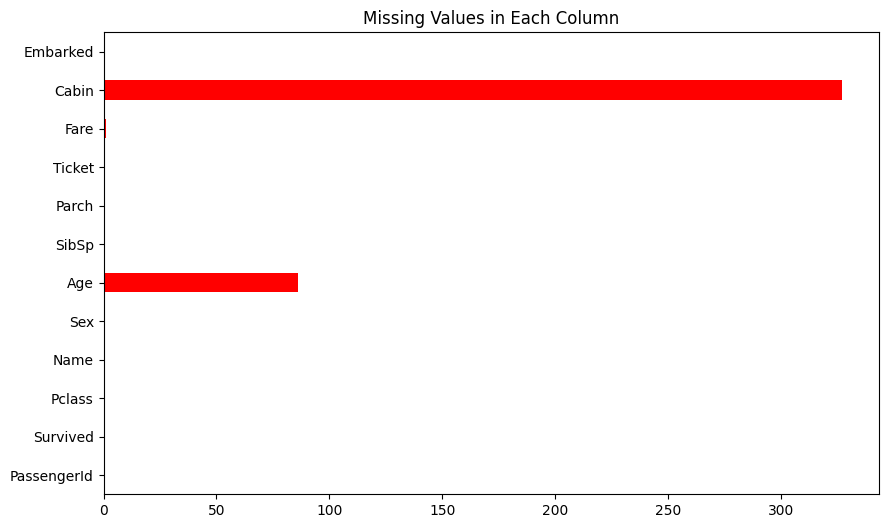

In [8]:
plt.figure(figsize=(10,6))
df.isnull().sum().plot(kind='barh', color='red')
plt.title('Missing Values in Each Column')
plt.show()


# 9. Gender Distribution (Value Counts + Bar Plot)
Plotted a bar chart of male vs. female passengers to understand gender distribution.
This also hints at survival patterns which we explore later.

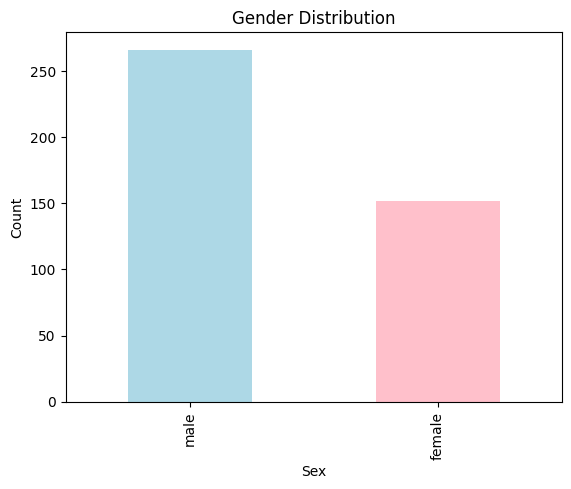

In [9]:

df['Sex'].value_counts().plot(kind='bar', color=['lightblue', 'pink'])

plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


# 10. Survival Rate by Gender (Bar Plot)
Analyzed how survival rates vary between males and females using a grouped bar plot.
From here, it’s evident that females had a much higher survival rate compared to males, which aligns with the historical “women and children first” evacuation policy.



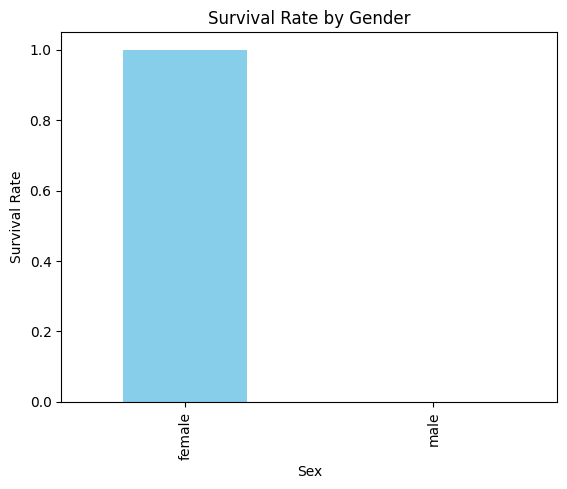

In [10]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()


# 🚢 Titanic EDA Summary:
I explored the Titanic dataset to understand passenger survival patterns. After cleaning missing values, I analyzed how factors like Gender, Passenger Class, Fare, and Family size impacted survival. Visualizations showed that females and first-class passengers had higher survival rates, while most third-class male passengers didn’t survive. Using Pandas, Numpy, Matplotlib, and Seaborn, I visualized key patterns, correlations, and uncovered meaningful insights from the data.